In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To display all columns:
pd.set_option('display.max_columns', None)  # None means no limit

df = pd.read_csv("Sample - Superstore.csv",encoding='latin-1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
df.shape

(9994, 21)

## Checking for null values

In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Check for duplicated rows

In [5]:
df.duplicated().sum()

0

## Check for valid data type or data¶

In [6]:
# code to check no of unique values in a column and list them
num_list = [] # Generate a empty list to store feature index no in future
num = 0

cols_desc = [] # an empty list
for col in df.columns: # Iterate over cols
    num += 1
    num_list.append(num)
    cols_desc.append([col, df[col].dtypes,df[col].isna().sum(), round((df[col].isna().sum() / len(df)) * 100),df[col].nunique(),
     df[col].unique()])

desc = pd.DataFrame(data=cols_desc,index=num_list,columns=['Data_Features','dtype','Null','Null_%','no_of_uni_val','Uni_val_list'])

desc

,Data_Features,dtype,Null,Null_%,no_of_uni_val,Uni_val_list
1,Row ID,int64,0,0,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,Order ID,object,0,0,5009,"[CA-2016-152156, CA-2016-138688, US-2015-10896..."
3,Order Date,object,0,0,1237,"[11/8/2016, 6/12/2016, 10/11/2015, 6/9/2014, 4..."
4,Ship Date,object,0,0,1334,"[11/11/2016, 6/16/2016, 10/18/2015, 6/14/2014,..."
5,Ship Mode,object,0,0,4,"[Second Class, Standard Class, First Class, Sa..."
6,Customer ID,object,0,0,793,"[CG-12520, DV-13045, SO-20335, BH-11710, AA-10..."
7,Customer Name,object,0,0,793,"[Claire Gute, Darrin Van Huff, Sean O'Donnell,..."
8,Segment,object,0,0,3,"[Consumer, Corporate, Home Office]"
9,Country,object,0,0,1,[United States]
10,City,object,0,0,531,"[Henderson, Los Angeles, Fort Lauderdale, Conc..."


## Descriptive statistics

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Converting Date Columns

#### We have to convert "Order Date" and Ship Date" from Object data type to datetime data type

In [9]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Creating new columns based on Date columns

#### You can see that Order Date col is in "day-month-year" format, we have to get day, month and year sepearte for our analysis

In [11]:
# Extract day, month, and year
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [12]:
df.shape

(9994, 24)

In [13]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,11,2016


## <span style="color:green"><b>Monthly Sales Analysis</b></span>

In [14]:
df.loc[:,"Order Month"].nunique()

12

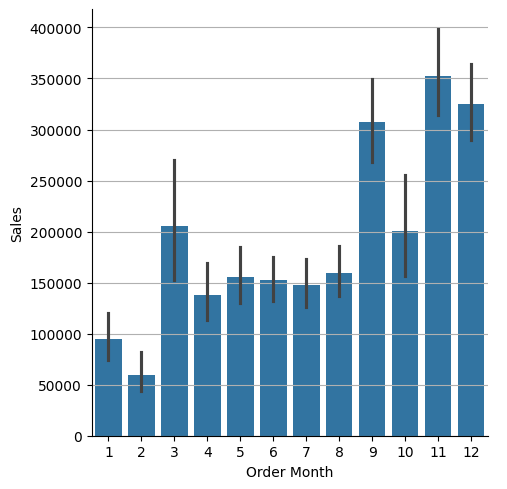

In [15]:
sns.catplot(x="Order Month",y="Sales",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.show()

#### November (11nth) month had highest sales and Febrauary (2ND) month had lowest sales

## <span style="color:green"><b>Product Category Sales Analysis</b></span>

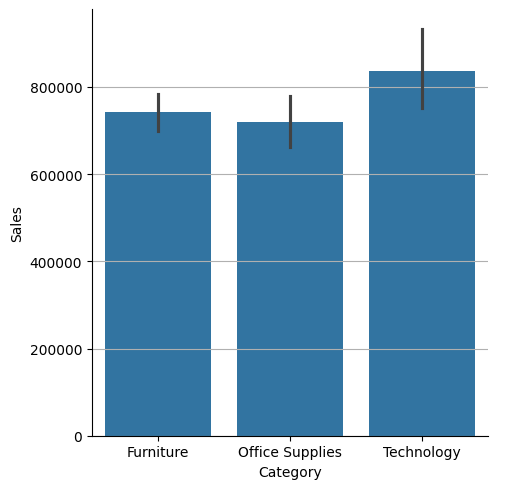

In [16]:
sns.catplot(x="Category",y="Sales",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.show()

#### Technology category had highest sales and Office supplies category had lowest sales

## <span style="color:green"><b>Product Sub-Category' Sales Analysis</b></span>

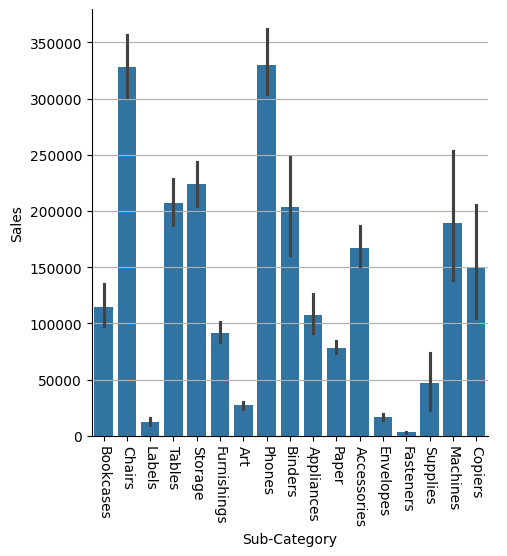

In [17]:
sns.catplot(x="Sub-Category",y="Sales",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.xticks(rotation=270)
plt.show()

#### Phones sub-category had highest sales and Fasteners sub-category had lowest sales

## <span style="color:green"><b>Monthly Profit Analysis</b></span>

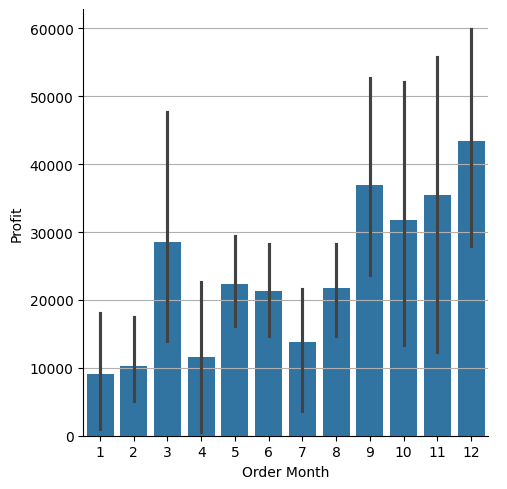

In [18]:
sns.catplot(x="Order Month",y="Profit",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.show()

#### December (12 th) month had highest Profit and January (1st) month had lowest Profit

## <span style="color:green"><b>Product Category Profit Analysis</b></span>

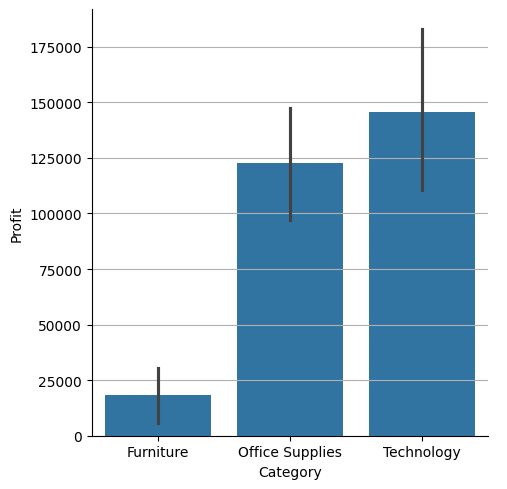

In [19]:
sns.catplot(x="Category",y="Profit",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.show()

#### Technology category had highest Profit and Furniture category had lowest Profit

## <span style="color:green"><b>Product Sub-Category Profit Analysis</b></span>

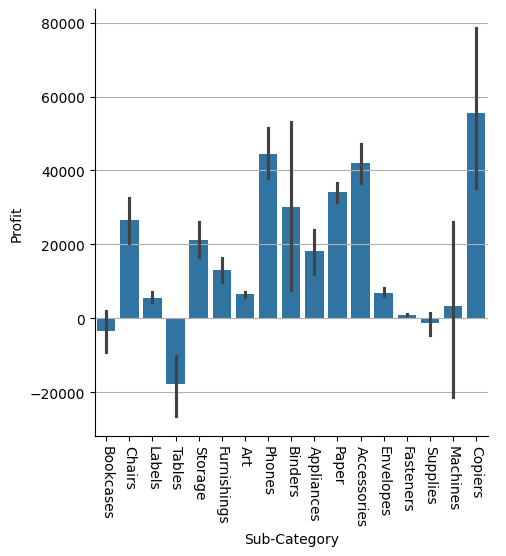

In [20]:
sns.catplot(x="Sub-Category",y="Profit",data=df,kind="bar",estimator=np.sum)
plt.grid(axis="y")
plt.xticks(rotation=270)
plt.show()

#### Copiers sub-category had highest Profit and Tables sub-category had lowest Profit

## <span style="color:green"><b>Sales and Profit Analysis</b></span>

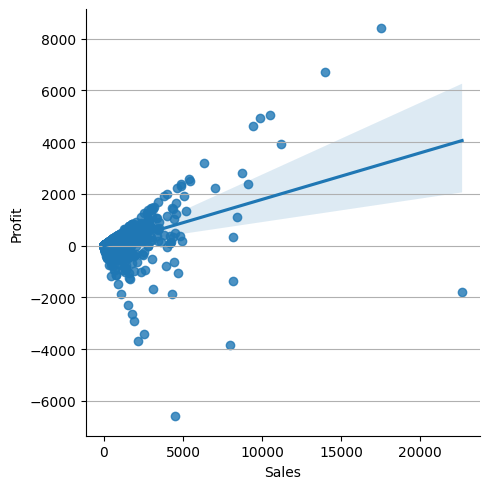

In [21]:
sns.lmplot(x="Sales",y="Profit",data=df)
plt.grid(axis="y")
plt.show()

In [22]:
# Calculate correlation between Sales and Profit
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales and Profit:", correlation)

Correlation between Sales and Profit: 0.4790643497377061


#### Since 0.479 falls between 0.4 and 0.6, it suggests a moderate positive correlation—meaning that as Sales increase, Profit tends to increase, but the relationship is not very strong.

## <span style="color:green"><b>Sales to Profit Ratio</b></span>

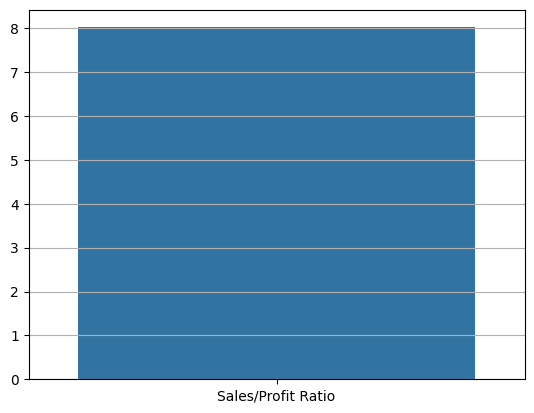

In [23]:
# Calculate the ratio of the sum of Sales to the sum of Profit
ratio = df["Sales"].sum() / df["Profit"].sum()

# Create a barplot for the calculated ratio
sns.barplot(x=["Sales/Profit Ratio"], y=[ratio])
plt.grid(axis="y")
plt.show()

#### On an average order sales is 8 times more than Profit

## <span style="color:green"><b>Sales to Profit Ratio by Product category</b></span>

#### We need to create a column named "Sales_to_Profit_Ratio" with logic df["Sales"].sum() / df["Profit"].sum()

In [24]:
df["Sales_to_Profit_Ratio"] = df["Sales"] / df["Profit"]

In [25]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Sales_to_Profit_Ratio
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,11,2016,6.250000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,11,2016,3.333333
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,12,6,2016,2.127660


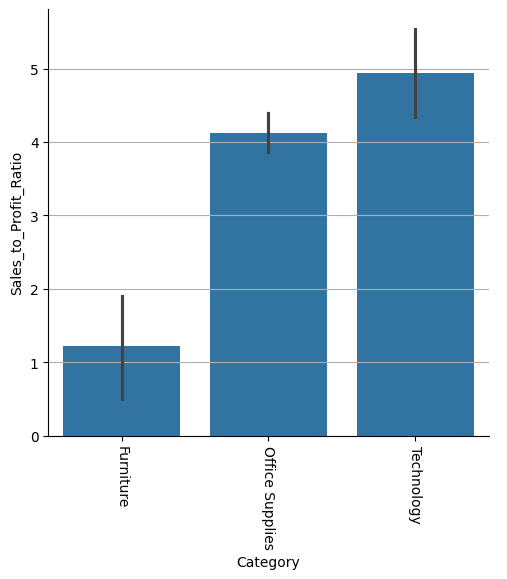

In [28]:
sns.catplot(x="Category",y="Sales_to_Profit_Ratio",data=df,kind="bar",estimator=np.mean)
plt.grid(axis="y")
plt.xticks(rotation=270)
plt.show()

#### On an average order Technology product category has highest sales to profit ratio
#### On an average order Furniture product category has lowest sales to profit ratio

## <span style="color:green"><b>Sales to Profit Ratio by Product Sub-Category</b></span>

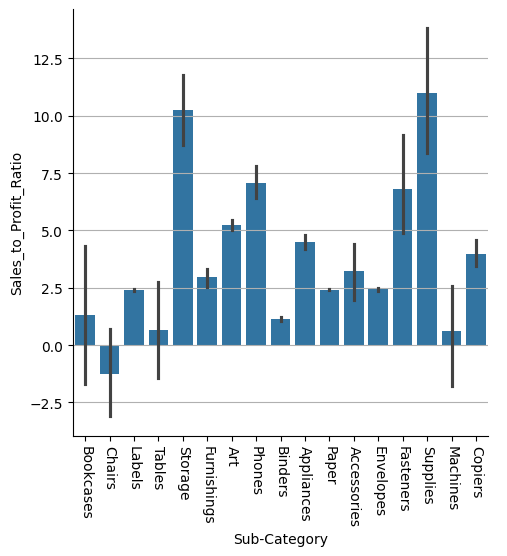

In [33]:
sns.catplot(x="Sub-Category",y="Sales_to_Profit_Ratio",data=df,kind="bar",estimator=np.mean)
plt.grid(axis="y")
plt.xticks(rotation=270)
plt.show()

#### On an average order Suppliers product Sub-Category has highest sales to profit ratio
#### On an average order Chairs product Sub-Category has lowest sales to profit ratio

# <span style="color:blue"><b>END</b></span>